# NY_TREES_prediction


* Modelo de previsão da saúde das árvores de Nova York

https://www.nycgovparks.org/trees/treescount

## Carregamento de dados 

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [7]:
df = pd.read_csv('2015-street-tree-census-tree-data.csv')

In [11]:
df['health1'] = df['health'].replace(['Good','Fair','Poor'],[3,2,1])

## análise exploratória


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

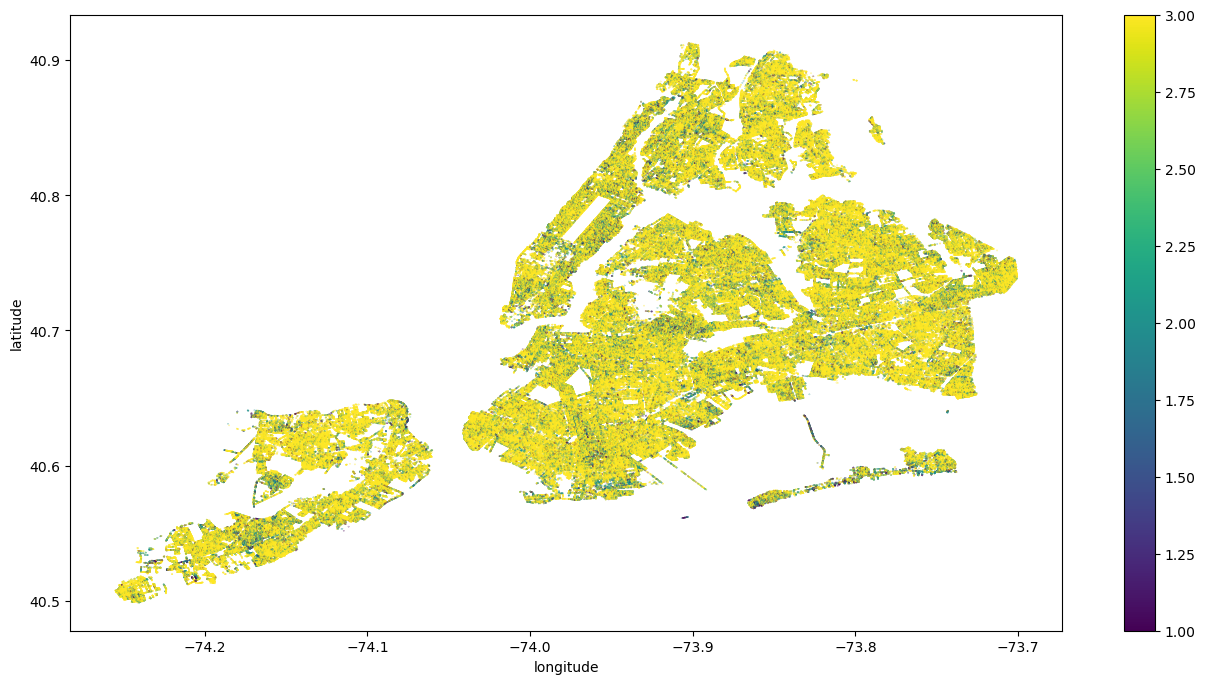

In [12]:
df.plot(kind ='hexbin', x = 'longitude', y = 'latitude', C = 'health1',
                    cmap="viridis", gridsize = 5000, figsize =(16,8))

In [13]:
df.pivot_table(index='health', columns= ['curb_loc'],    
                 values='problems', aggfunc='count',margins=True)

# mostra uma variavel pouco significativa (?)

curb_loc,OffsetFromCurb,OnCurb,All
health,,,
Fair,4030,92467,96497
Good,20872,507938,528810
Poor,963,25853,26816
All,25865,626258,652123


<AxesSubplot:title={'center':'tree_dbh'}, xlabel='health'>

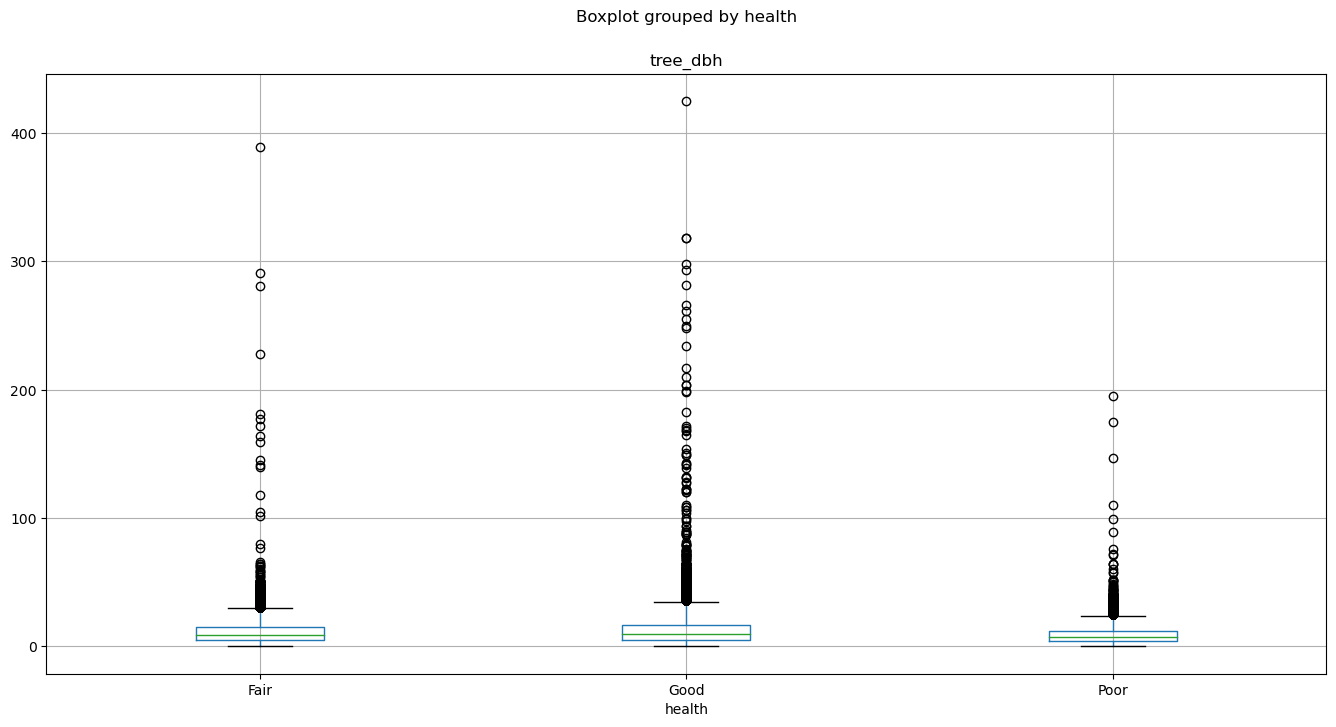

In [14]:
df.boxplot(by = 'health', column = 'tree_dbh', figsize = (16,8))
# presença de vários outliers 

In [15]:
df[['stump_diam','status']].value_counts()
# stump_diam apenas é atribuída a arvores que são apenas o toco e conequentemente não podem ter suas saúdes medidas 

stump_diam  status
0           Alive     652173
            Dead       13961
4           Stump        966
5           Stump        939
3           Stump        779
                       ...  
96          Stump          1
92          Stump          1
72          Stump          1
82          Stump          1
140         Stump          1
Length: 101, dtype: int64

In [16]:
df.problems.value_counts()
# talvez separar em duas categorias (com problemas)(sem problemas)

None                                                                          426280
Stones                                                                         95673
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
RootOther                                                                      11418
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
MetalGrates,RootOther,WiresRope,TrunkLights,BranchLights,BranchOther               1
MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther                         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: problems, Length: 232, dtype: int64

In [17]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl', 'health1'],
      dtype='object')

In [18]:
df.pivot_table(index='health', columns= ['root_stone'],    
                 values='problems', aggfunc='count',margins=True)

root_stone,No,Yes,All
health,,,
Fair,72998,23499,96497
Good,417498,111312,528810
Poor,21628,5188,26816
All,512124,139999,652123


In [19]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl', 'health1'],
      dtype='object')

In [21]:
df[['problems','root_stone','root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other','brch_light', 'brch_shoe', 'brch_other']]


,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,None,No,No,No,No,No,No,No,No,No
1,Stones,Yes,No,No,No,No,No,No,No,No
2,None,No,No,No,No,No,No,No,No,No
3,Stones,Yes,No,No,No,No,No,No,No,No
4,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
683783,None,No,No,No,No,No,No,No,No,No
683784,None,No,No,No,No,No,No,No,No,No
683785,None,No,No,No,No,No,No,No,No,No
683786,None,No,No,No,No,No,No,No,No,No


<AxesSubplot:ylabel='guards'>

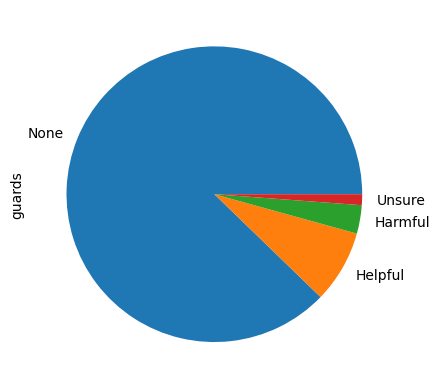

In [22]:
df['guards'].value_counts().plot( kind = 'pie')

In [23]:
df['steward'].value_counts()

# Indicates the number of unique signs of stewardship observed for this tree. Not recorded for stumps or dead trees


None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [24]:
df['block_id'] = df['block_id'].astype(str)

# block_id --> variável categórica 

In [25]:
df['block_id'].value_counts(), df['block_id'].count()

# não há como inserir 101390 classificações no modelo 
# sendo que: description --> Identifier linking each tree to the block in the blockface table/shapefile that it is mapped on. 

(204850    450
 602362    358
 208115    250
 506756    206
 233208    197
          ... 
 311548      1
 400052      1
 312660      1
 214054      1
 348185      1
 Name: block_id, Length: 101390, dtype: int64,
 683788)

In [26]:
df.pivot_table(index='spc_common', columns= 'health', values='tree_id', aggfunc='count',margins=True)

health,Fair,Good,Poor,All
spc_common,,,,
'Schubert' chokecherry,717.0,3929.0,242.0,4888
American beech,38.0,214.0,21.0,273
American elm,1295.0,6412.0,268.0,7975
American hophornbeam,158.0,866.0,57.0,1081
American hornbeam,203.0,1221.0,93.0,1517
...,...,...,...,...
white ash,166.0,897.0,58.0,1121
white oak,263.0,1331.0,92.0,1686
white pine,36.0,155.0,11.0,202


In [27]:
df.spc_common.value_counts(), df.spc_common.count()

(London planetree    87014
 honeylocust         64264
 Callery pear        58931
 pin oak             53185
 Norway maple        34189
                     ...  
 black pine             37
 pitch pine             33
 Osage-orange           29
 Scots pine             25
 Virginia pine          10
 Name: spc_common, Length: 132, dtype: int64,
 652169)

In [28]:
df.dtypes.value_counts()

# numero maior de variáveis categóricas 

object     27
int64      10
float64     9
dtype: int64

In [29]:
df['status'].value_counts(), df['status'].count()

(Alive    652173
 Stump     17654
 Dead      13961
 Name: status, dtype: int64,
 683788)

In [30]:
df['health'].value_counts(), df['health'].count()
# Nem todas as arvores possuem a classificação de saúde 
# retirar NaN 

(Good    528850
 Fair     96504
 Poor     26818
 Name: health, dtype: int64,
 652172)

In [31]:
df.pivot_table(index='status', columns= 'health', values='tree_id', aggfunc='count',margins=True)

# Apenas arvores vivas tem  classificação saúde

health,Fair,Good,Poor,All
status,,,,
Alive,96504,528850,26818,652172
All,96504,528850,26818,652172


## seleção de features

In [32]:
df.drop(['tree_id','spc_latin', 'block_id','user_type','address', 'postcode',
       'zip_city', 'community board', 'borocode', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'x_sp', 'y_sp', 'council district','census tract', 'bin', 'bbl',                           
       'created_at','stump_diam','curb_loc' ], axis=1, inplace=True)

# talvez 'problems' 

# VARIAVEIS RETIRADAS  

# tree_id = unique identification number for each tree point.
# spc_latin = equals to spc_common
# block_id = to many groups with no importance description --> Identifier linking each tree to the block in the blockface 
# table/shapefile that it is mapped on. 
# user_type = This field describes the category of user who collected this tree point's data.
# address = Nearest estimated address to tree
# postcode = Five-digit zipcode in which tree is located 
# zip_city =City as derived from zipcode. This is often (but not always) the same as borough. 
# community board
# borocode == borough
# cncldist = NYC Council District 
# st_assem = State Assembly District in which tree point is located
# st_senate =  NY State Senate District 
# 'nta', = This is the NTA Code corresponding to the neighborhood tabulation area from the 2010 US Census that the tree point falls into
# 'nta_name', = This is the NTA name corresponding to the neighborhood tabulation area from the 2010 US Census that the tree point falls into.
# 'boro_ct', = This is the boro_ct identifyer for the census tract that the tree point falls into.
# state = All features given value 'New York'
# x_sp = X coordinate, in state plane. Units are feet.
# y_sp = Y  coordinate, in state plane. Units are feet.
# council district
# census tract
# bin
# bbl
# created_at = The date tree points were collected in the census software
# stump_diam = Diameter of stump measured through the center, rounded to the nearest inch.
# curb_loc

In [33]:
df.dtypes.value_counts()

object     17
float64     3
int64       1
dtype: int64

In [34]:
df.columns

Index(['tree_dbh', 'status', 'health', 'spc_common', 'steward', 'guards',
       'sidewalk', 'problems', 'root_stone', 'root_grate', 'root_other',
       'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe',
       'brch_other', 'borough', 'latitude', 'longitude', 'health1'],
      dtype='object')

In [35]:
df = df.dropna()

<AxesSubplot:>

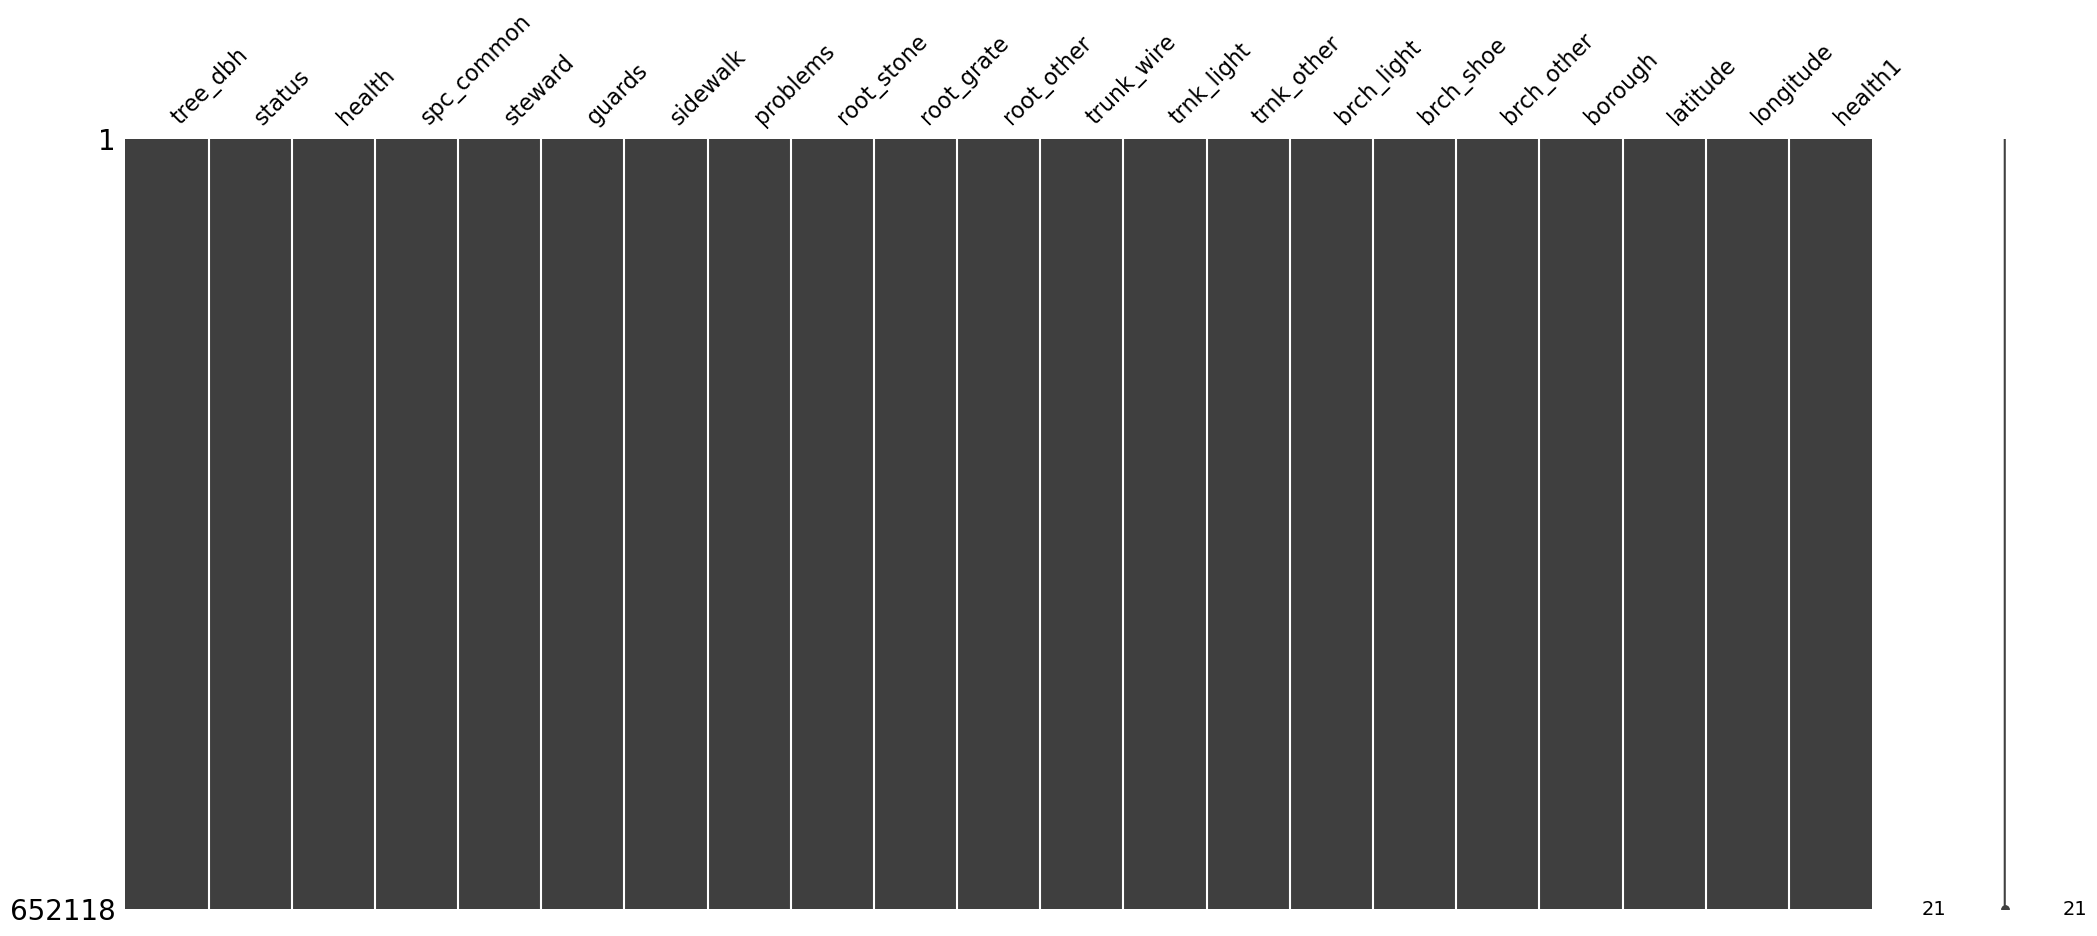

In [36]:
import missingno as nm 
nm.matrix(df)

In [37]:
df.status.value_counts()
# Apenas arvores vivas no DataFrame

Alive    652118
Name: status, dtype: int64

In [38]:
df = df.drop(['status'], axis = 1)

In [39]:
df = df.drop(['problems',], axis = 1 )

In [40]:
df.spc_common.value_counts()
#'spc_common'

London planetree    87012
honeylocust         64258
Callery pear        58924
pin oak             53179
Norway maple        34189
                    ...  
black pine             37
pitch pine             33
Osage-orange           29
Scots pine             25
Virginia pine          10
Name: spc_common, Length: 132, dtype: int64

In [41]:
df1 = pd.get_dummies(df, columns=['steward', 'guards', 'borough','sidewalk','root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other'], drop_first=True)

In [42]:
df1['trunk_prob'] = df1['trunk_wire_Yes'] + df1['trnk_light_Yes'] +  df1['trnk_other_Yes']
df1['brch_prob'] = df1['brch_light_Yes'] + df1['brch_shoe_Yes'] + df1['brch_other_Yes']
df1['root_prob'] = df1['root_stone_Yes'] + df1['root_grate_Yes'] +  df1['root_other_Yes'] + df1['trunk_wire_Yes']

In [43]:
df1['trunk_prob'].replace([1,2,3,4,5,6,7,8,9],[1,1,1,1,1,1,1,1,1],inplace=True)
df1['brch_prob'].replace([1,2,3,4,5,6,7,8,9],[1,1,1,1,1,1,1,1,1],inplace=True) 
df1['root_prob'].replace([1,2,3,4,5,6,7,8,9],[1,1,1,1,1,1,1,1,1],inplace=True)

In [44]:
df1 = df1.drop(['root_stone_Yes','root_grate_Yes','root_other_Yes','trunk_wire_Yes',
        'trunk_wire_Yes', 'trnk_light_Yes', 'trnk_other_Yes',
            'brch_light_Yes', 'brch_shoe_Yes', 'brch_other_Yes'],axis =1 )

In [67]:
y = df1['health']
X = df1.drop(['health','spc_common', 'health1'],axis = 1)

### Modelo

*Tree based model*
* Random forests

In [68]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y)

In [69]:
print('X1_train =', X1_train.shape)
print('X1_test =',X1_test.shape)
print('y1_train =',y1_train.shape)
print('y1_test =',y1_test.shape)

X1_train = (489088, 17)
X1_test = (163030, 17)
y1_train = (489088,)
y1_test = (163030,)


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X1_train,y1_train)

RandomForestClassifier(random_state=42)

<BarContainer object of 17 artists>

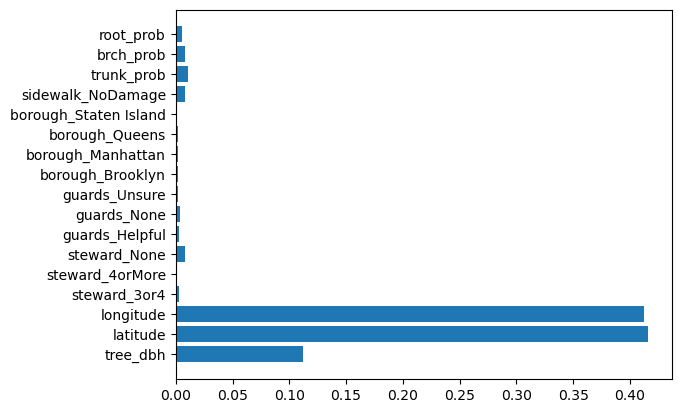

In [71]:
plt.barh(X1_test.columns, rf.feature_importances_)

In [72]:
#import shap
#explainer = shap.TreeExplainer(rf)
#shap_values = explainer.shap_values(X1_test)

#shap.summary_plot(shap_values, X1_test, plot_type="bar")

### Validação do modelo de RF
* Confusion matrix 

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

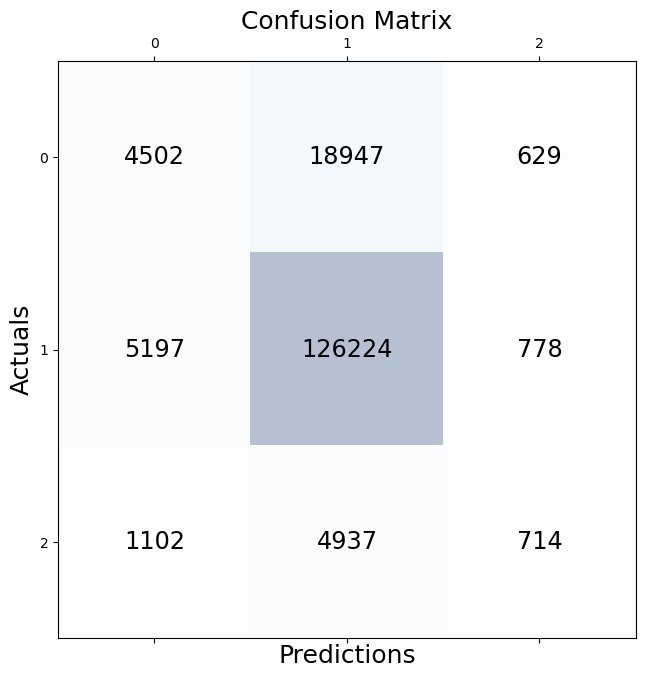

In [74]:
y1_pred = rf.predict(X1_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y1_test, y_pred=y1_pred)
#
# Print confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [75]:
accuracy_score(y1_test, y1_pred)

0.8062319818438324

* classification_report

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, y1_pred, target_names=['Fair', 'Good', 'Poor']))

              precision    recall  f1-score   support

        Fair       0.42      0.19      0.26     24078
        Good       0.84      0.95      0.89    132199
        Poor       0.34      0.11      0.16      6753

    accuracy                           0.81    163030
   macro avg       0.53      0.42      0.44    163030
weighted avg       0.76      0.81      0.77    163030



In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}